In [1]:
# Macの問題回避
import os
import platform
if platform.system() == 'Darwin':
    os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
# 必要ライブラリの宣言
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# データ準備

# 変数定義

# D: 入力ノード数
D = 784

# H: 隠れ層のノード数
H = 128

# 分類クラス数
num_classes = 10

# Kerasの関数でデータの読み込み
from keras.datasets import mnist
(x_train_org, y_train), (x_test_org, y_test) \
 = mnist.load_data()

# 入力データの加工 (次元を1次元に)
x_train = x_train_org.reshape(-1, D) / 255.0
x_test = x_test_org.reshape((-1, D)) / 255.0

# 正解データの加工 (One Hot Vectorに)
from keras.utils import np_utils
y_train_ohe =\
 np_utils.to_categorical(y_train, num_classes)
y_test_ohe =\
 np_utils.to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 1s 0us/step


In [4]:
# モデルの定義

# 必要ライブラリのロード
from keras.models import Sequential
from keras.layers import Dense

# Sequentialモデルの定義
model = Sequential()

# 隠れ層1の定義
model.add(Dense(H, activation='relu', input_shape=(D,)))

# 隠れ層2の定義
model.add(Dense(H, activation='relu'))

# 出力層
model.add(Dense(num_classes, activation='softmax'))

# モデルのコンパイル
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'sgd',
              metrics=['accuracy'])

2022-01-03 17:03:31.153550: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# 学習

# 学習の単位
batch_size = 512

# 繰り返し回数
nb_epoch = 50

# モデルの学習
history1 = model.fit(
    x_train, 
    y_train_ohe,
    batch_size = batch_size, 
    epochs = nb_epoch,
    verbose = 1, 
    validation_data = (x_test, y_test_ohe))

Epoch 1/50
118/118 [==============================] - 1s 4ms/step - loss: 2.0513 - accuracy: 0.3891 - val_loss: 1.7440 - val_accuracy: 0.6305
Epoch 2/50
118/118 [==============================] - 0s 3ms/step - loss: 1.4299 - accuracy: 0.7117 - val_loss: 1.1059 - val_accuracy: 0.7721
Epoch 3/50
118/118 [==============================] - 0s 3ms/step - loss: 0.9362 - accuracy: 0.7984 - val_loss: 0.7671 - val_accuracy: 0.8227
Epoch 4/50
118/118 [==============================] - 0s 3ms/step - loss: 0.7037 - accuracy: 0.8307 - val_loss: 0.6125 - val_accuracy: 0.8447
Epoch 5/50
118/118 [==============================] - 0s 3ms/step - loss: 0.5879 - accuracy: 0.8500 - val_loss: 0.5271 - val_accuracy: 0.8615
Epoch 6/50
118/118 [==============================] - 0s 3ms/step - loss: 0.5192 - accuracy: 0.8640 - val_loss: 0.4737 - val_accuracy: 0.8745
Epoch 7/50
118/118 [==============================] - 0s 3ms/step - loss: 0.4733 - accuracy: 0.8742 - val_loss: 0.4362 - val_accuracy: 0.8830
Epoch 

In [6]:
import numpy as np

#  ネイピア数を底とする指数関数の定義
def f(x):
    return np.exp(x)

# 微少な数 hの定義
h = 0.001

# f'(0)の近似計算
# f'(0) = f(0) = 1に近い値になるはず
diff = (f(0 + h) - f(0 - h))/(2 * h)

# 結果の確認
print(diff)

1.0000001666666813


In [7]:
# 必要ライブラリのロード
from keras.models import Sequential
from keras.layers import Dense

# 学習の単位
batch_size = 512

# 繰り返し回数
nb_epoch = 50

In [8]:
# Sequentialモデルの定義
model = Sequential()

# 隠れ層1の定義
model.add(Dense(H, activation='relu', kernel_initializer='he_normal', input_shape=(D,)))

# 隠れ層2の定義
model.add(Dense(H, activation='relu', kernel_initializer='he_normal'))

# 出力層
model.add(Dense(num_classes, activation='softmax', kernel_initializer='he_normal'))

In [9]:
# モデルのコンパイル
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'sgd',
              metrics=['accuracy'])

# モデルの学習
history1 = model.fit(
    x_train, 
    y_train_ohe,
    batch_size = batch_size, 
    epochs = nb_epoch,
    verbose = 1, 
    validation_data = (x_test, y_test_ohe))

Epoch 1/50
118/118 [==============================] - 1s 4ms/step - loss: 1.8430 - accuracy: 0.4803 - val_loss: 1.3526 - val_accuracy: 0.7424
Epoch 2/50
118/118 [==============================] - 0s 3ms/step - loss: 1.0634 - accuracy: 0.7856 - val_loss: 0.8099 - val_accuracy: 0.8280
Epoch 3/50
118/118 [==============================] - 0s 3ms/step - loss: 0.7133 - accuracy: 0.8369 - val_loss: 0.5992 - val_accuracy: 0.8593
Epoch 4/50
118/118 [==============================] - 0s 3ms/step - loss: 0.5662 - accuracy: 0.8612 - val_loss: 0.4995 - val_accuracy: 0.8772
Epoch 5/50
118/118 [==============================] - 0s 3ms/step - loss: 0.4898 - accuracy: 0.8745 - val_loss: 0.4426 - val_accuracy: 0.8870
Epoch 6/50
118/118 [==============================] - 0s 3ms/step - loss: 0.4432 - accuracy: 0.8832 - val_loss: 0.4060 - val_accuracy: 0.8945
Epoch 7/50
118/118 [==============================] - 0s 3ms/step - loss: 0.4113 - accuracy: 0.8902 - val_loss: 0.3808 - val_accuracy: 0.8988
Epoch 

In [10]:
# Sequentialモデルの定義
model = Sequential()

# 隠れ層1の定義
model.add(Dense(H, activation='relu', kernel_initializer='he_normal', input_shape=(D,)))

# 隠れ層2の定義
model.add(Dense(H, activation='relu', kernel_initializer='he_normal'))

# 出力層
model.add(Dense(num_classes, activation='softmax', kernel_initializer='he_normal'))

In [11]:
# モデルのコンパイル
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics=['accuracy'])

# モデルの学習
history2 = model.fit(
    x_train, 
    y_train_ohe,
    batch_size = batch_size, 
    epochs = nb_epoch,
    verbose = 1, 
    validation_data = (x_test, y_test_ohe))

Epoch 1/50
118/118 [==============================] - 1s 4ms/step - loss: 0.4452 - accuracy: 0.8757 - val_loss: 0.2521 - val_accuracy: 0.9246
Epoch 2/50
118/118 [==============================] - 0s 3ms/step - loss: 0.1946 - accuracy: 0.9438 - val_loss: 0.1857 - val_accuracy: 0.9440
Epoch 3/50
118/118 [==============================] - 0s 3ms/step - loss: 0.1413 - accuracy: 0.9584 - val_loss: 0.1454 - val_accuracy: 0.9555
Epoch 4/50
118/118 [==============================] - 0s 3ms/step - loss: 0.1090 - accuracy: 0.9685 - val_loss: 0.1176 - val_accuracy: 0.9647
Epoch 5/50
118/118 [==============================] - 0s 3ms/step - loss: 0.0875 - accuracy: 0.9741 - val_loss: 0.1136 - val_accuracy: 0.9636
Epoch 6/50
118/118 [==============================] - 0s 3ms/step - loss: 0.0726 - accuracy: 0.9787 - val_loss: 0.0905 - val_accuracy: 0.9718
Epoch 7/50
118/118 [==============================] - 0s 3ms/step - loss: 0.0610 - accuracy: 0.9819 - val_loss: 0.1059 - val_accuracy: 0.9641
Epoch 

In [12]:
# Sequentialモデルの定義
model = Sequential()

# 隠れ層1の定義
model.add(Dense(H, activation='relu', kernel_initializer='he_normal', input_shape=(D,)))

# 隠れ層2の定義
model.add(Dense(H, activation='relu', kernel_initializer='he_normal'))

# 出力層
model.add(Dense(num_classes, activation='softmax', kernel_initializer='he_normal'))

In [13]:
# モデルのコンパイル
from keras import optimizers
sgd = optimizers.SGD(momentum = 0.9)
model.compile(loss = 'categorical_crossentropy',
              optimizer = sgd,
              metrics=['accuracy'])

# モデルの学習
history3 = model.fit(
    x_train, 
    y_train_ohe,
    batch_size = batch_size, 
    epochs = nb_epoch,
    verbose = 1, 
    validation_data = (x_test, y_test_ohe))

AttributeError: module 'keras.optimizers' has no attribute 'SGD'

NameError: name 'history3' is not defined

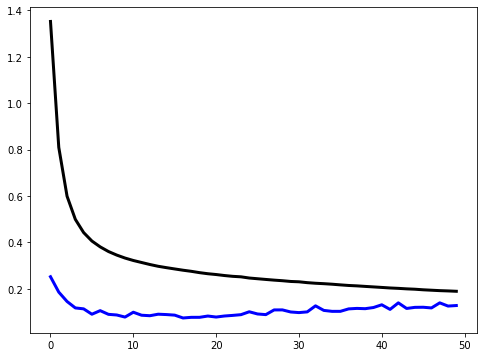

In [14]:
#import matplotlib.pyplot as plt

# 学習曲線の表示 (損失関数値)
plt.figure(figsize=(8,6))
plt.plot(history1.history['val_loss'],label='SGD', lw=3, c='k')
plt.plot(history2.history['val_loss'],label='rmsprop', lw=3, c='b')
plt.plot(history3.history['val_loss'],label='momentum', lw=3, c='k', linestyle='dashed')
plt.ylim(0,2)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.legend(fontsize=14)
plt.show()

NameError: name 'history3' is not defined

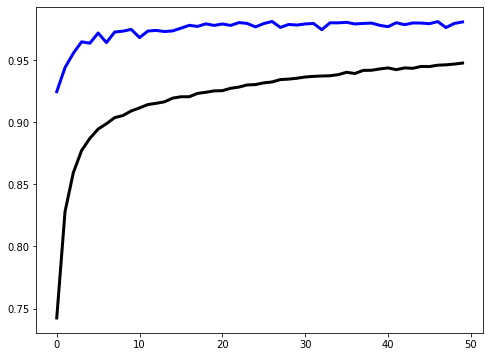

In [15]:
import matplotlib.pyplot as plt

# 学習曲線の表示 (精度)
plt.figure(figsize=(8,6))
plt.plot(history1.history['val_accuracy'],label='SGD', lw=3, c='k')
plt.plot(history2.history['val_accuracy'],label='rmsprop', lw=3, c='b')
plt.plot(history3.history['val_accuracy'],label='momentum', lw=3, c='k', linestyle='dashed')
plt.ylim(0.8,1)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.legend(fontsize=14)
plt.show()

In [16]:
# 正解データのデータ数
div = 8

# 近似多項式の次元
dim = 8

# y = -x*4 + x**3 -3x**2 + 8x -7
p = [-1, 1, -3, 8, -7]

# xの定義域 [-2, 1]
xMin = -2
xMax = 1

In [17]:
# x : xMin と xManの間をdiv個に分割したベクトル
x = np.linspace(xMin, xMax, num=div)

# xx : xを10倍細かい間隔で分割したベクトル
xx = np.linspace(xMin, xMax, num=div*10)

# y, yy: x, xxそれぞれのベクトルに対して多項式の値を計算したベクトル
y = np.polyval(p, x)
yy = np.polyval(p, xx)

# z: yに正規分布のノイズを加える。これを正解データとする
z = y + 5 * np.random.randn(div)

In [18]:
# ベクトル表示用関数
def print_fix(x):
    [print('{:.3f}'.format(n)) for n in x]
    
# モデルを引数として、多項式の係数を表示する関数    
def print_fix_model(m):
    w = m.coef_.tolist()
    w[0] = m.intercept_
    print_fix(w)    

In [19]:
# 多項式行列を作成し、モデルの入力変数とする

# x**nのベクトル計算用関数
def f(x) :
    return [x**i for i in range(dim)]

# X : xベクトルから多項式二次元配列を作ったもの
X = [f(x0) for x0 in x]

# XX : xxベクトル多項式二次元配列を作ったもの
XX = [f(x0) for x0 in xx]

In [20]:
# 線形モデルライブラリのロード
from sklearn.linear_model import LinearRegression

# モデルの初期化、学習
model = LinearRegression().fit(X, z)

# 予測値の取得
yy_pred = model.predict(XX)

In [21]:
# Ridgeモデルラブラリのロード
from sklearn.linear_model import Ridge

# モデルの生成、学習
#model2 = Ridge(alpha=5).fit(X, z)
model2 = Ridge(alpha=0.5).fit(X, z)

In [22]:
# 予測値の取得
yy_pred2 = model2.predict(XX)

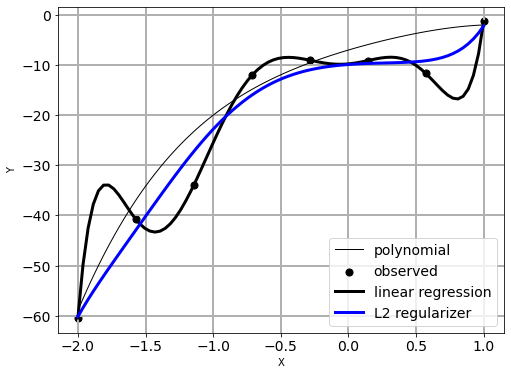

In [23]:
# グラフ表示
plt.figure(figsize=(8,6))
plt.plot(xx, yy, label='polynomial', lw=1, c='k')
plt.scatter(x, z, label='observed', s=50, c='k')
plt.plot(xx, yy_pred, label='linear regression', lw=3, c='k')
plt.plot(xx, yy_pred2, label='L2 regularizer', lw=3, c='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.legend(fontsize=14)
plt.show()